# Day 5 - Gradient descent for simple linear regression

Extending code from day 3

caution:  this dataset has very few points, so local gradient estimation
using partial gradients in each direction (B0, B1)
has very little gradient to descend on.  

This will make it slow and highly dependent on your starting beta.  
Normally there are other much-better numerical techniques to deal with this...  
Dont use this local gradient descent code on real problems!


In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Code to set up the matrix and make initial guess for Betas

In [2]:
#code to load your matrix here
pretest_scores = np.array([95., 85., 80., 70., 60.]).T  #(5x1 array)
y = np.array([[85.,95.,70.,65.,70.]]).T

#build the design matrix X
X = np.vstack((np.ones(len(pretest_scores)),pretest_scores)).T                         



## Helper Functions and Utilities

In [3]:
#function to generate line points for plotting
def computeline(intercept,slope,start_x,end_x):
    points_x=[start_x,end_x]
    points_y=[intercept,intercept+slope*end_x]
    return points_x, points_y


def plot_regression_results(X, y, t, ythat, beta0,beta1):
    fig = plt.figure()
    plt.axis([0.,100.,0.,100.])
    #add the points in black
    plt.scatter(X[:,1],y,c='k',marker='x')
    #add the predicted final exam score for Aptitude test = 80
    plt.scatter(t[0,1],ythat,c='g',marker='o')
    #add the student line in blue
    points_x,points_y = computeline(beta0,beta1,0,100)
    plt.plot(points_x,points_y,c='r')
    plt.title('Simple Regression')
    plt.ylabel('Final Exam Score')
    plt.xlabel('Aptitude test score')
    #plt.axis('equal')
    plt.grid(True)
    plt.show()


## Code for the student's iterative search for the best coefficients
Complete the code stub below to compute and return the local gradient of the cost (error) surface in the immediate vicinity of the current values of the coefficients

In [4]:
def compute_gradient(X,y,beta,epsilon):
    '''
    Given the training data and the current estimate for beta,
    compute the gradients in each dimension of beta
    Returns gradient
    '''
    
    errorGradient0 = 0   #placeholder - you will write code below to compute this
    errorGradient1 = 0   #placeholder - you will write code below to compute this
    
    #STUDENT CODE HERE 
    #compute the error gradients (slope of the error surface for a tiny change (epsilon) to the beta values)
    #-----------------------------------------------------------
    
    b0EpsMask = np.array([[+epsilon,-epsilon],[0,0]])
    b1EpsMask = np.array([[0,0],[+epsilon,-epsilon]])
    b0Eps = beta+b0EpsMask
    b1Eps = beta+b1EpsMask
    
    #determine which direction to go for each beta independently
    yhat0Eps = np.dot(X,b0Eps) #compute the possible yHats by altering only b0
    yhat1Eps = np.dot(X,b1Eps) #compute the possible yHats by altering only b1
           
    #compute current error
    yhat0Error = y-yhat0Eps
    yhat1Error = y-yhat1Eps
    
    #print(yhat0Error.shape)
    #done=True
    
    rss0Eps = np.diag(  np.dot((yhat0Error).T , (yhat0Error))  ) #using matrix mult to sum
    rss1Eps = np.diag(  np.dot((yhat1Error).T , (yhat1Error))  ) #using matrix mult to sum
    
    errorGradient0 = np.diff(rss0Eps, axis = 0) #find RSS gradient
    errorGradient1 = np.diff(rss1Eps, axis = 0) #find RSS gradient
    #--------------------------
    #END STUDENT CODE
    
    
    return [errorGradient0,errorGradient1]
    


## Guess Beta coefficients and evaluate the guess on the test point

Beta 
 [[ 50. ]
 [  0.3]] 

Design Matrix X 
 [[  1.  95.]
 [  1.  85.]
 [  1.  80.]
 [  1.  70.]
 [  1.  60.]] 

yhat 
 [[ 78.5]
 [ 75.5]
 [ 74. ]
 [ 71. ]
 [ 68. ]] 

ydif (prediction errors) 
 [[ -6.5]
 [-19.5]
 [  4. ]
 [  6. ]
 [ -2. ]] 


RSS:  [[ 478.5]] 

MSE:  [[ 95.7]] 

RMSE:  [[ 9.78263768]] 

Prediction at Aptitude 80 [[ 74.]] 



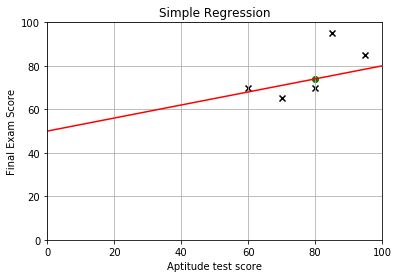

In [5]:
#beta guess here.  Note that later you will find this using gradient decent
#beta = np.array([[26.768,0.644]]).T    #guess the best betas (2 x 1 array)  

#STUDENT CODE HERE.... GUESS YOUR BETA VALUES FOR Beta0 and Beta1
#suggestion:  make the beta guess bad
#--------------
beta0 = 50.0
beta1 = 0.3
#------------
#END STUDENT CODE


beta = np.array([[beta0,beta1]]).T      

#print the Betas and X's
print('Beta','\n', beta, '\n')
print('Design Matrix X', '\n', X, '\n')

#estimate yhat for all datapoints
yhat = np.dot(X,beta)

print('yhat','\n',  yhat,'\n')

#find the difference betwen predicted and truth 
ydiff = yhat-y
print('ydif (prediction errors)', '\n',ydiff, '\n')

#compute RSS
rss = np.dot(ydiff.T,ydiff)
#compute MSE
mse = rss/len(ydiff)
#compute RMSE
rmse =  np.sqrt(mse)
print()
print('RSS: ', rss, '\n')
print('MSE: ', mse, '\n')
print('RMSE: ',rmse, '\n')

#make prediction on aptitude test score of 80
t = np.array([[1, 80]])
ythat = np.dot(t,beta)
print('Prediction at Aptitude 80', ythat, '\n')
plot_regression_results(X, y, t, ythat, beta0, beta1)

## Use gradient descent to find good values for the coefficients

Starting beta search


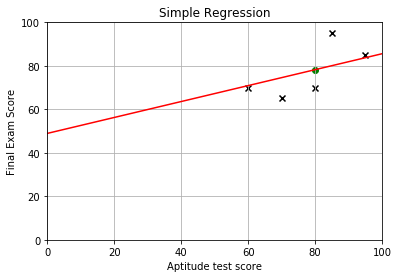

*** Iteration  10000  improvement 0.0005391488597865646  updatedRss:  384.9212383332527 
  B0:  48.93762250957025  B1:  0.3664300071088064 





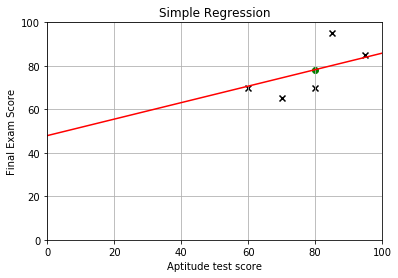

*** Iteration  20000  improvement 0.0004909126560050936  updatedRss:  379.7747217861448 
  B0:  47.92324777843021  B1:  0.37913009163644346 





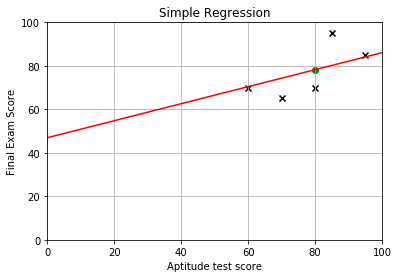

*** Iteration  30000  improvement 0.0004469920122573967  updatedRss:  375.0886503171758 
  B0:  46.955312788945776  B1:  0.39124874543033455 





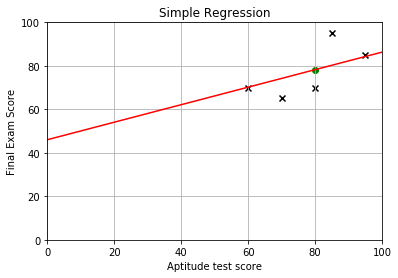

*** Iteration  40000  improvement 0.0004070008317853535  updatedRss:  370.8218291359021 
  B0:  46.03169145342122  B1:  0.4028125873449426 





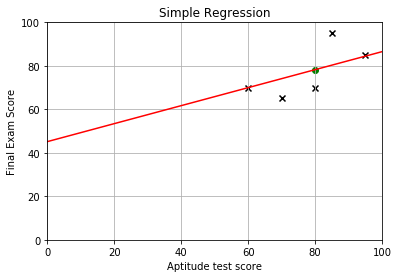

*** Iteration  50000  improvement 0.00037058755475527505  updatedRss:  366.93674903998266 
  B0:  45.15035502001865  B1:  0.41384701757719994 





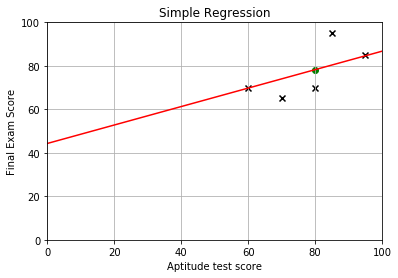

*** Iteration  60000  improvement 0.00033743207757197524  updatedRss:  363.3992566748487 
  B0:  44.3093676164267  B1:  0.4243762734679876 





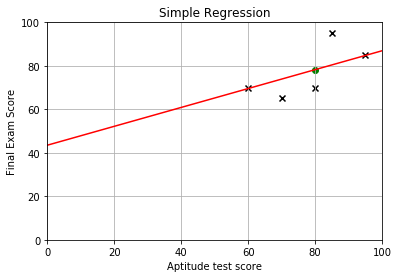

*** Iteration  70000  improvement 0.00030724293338835196  updatedRss:  360.17825429558604 
  B0:  43.5068819978261  B1:  0.43442348272519665 





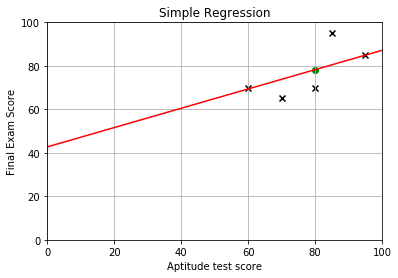

*** Iteration  80000  improvement 0.0002797547278987622  updatedRss:  357.24542638865285 
  B0:  42.74113548911089  B1:  0.4440107142371971 





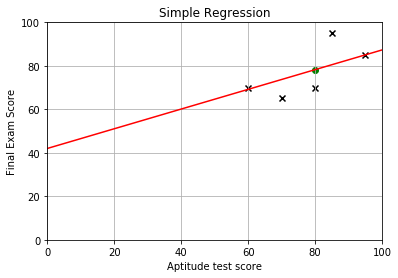

*** Iteration  90000  improvement 0.00025472581859276033  updatedRss:  354.5749907549324 
  B0:  42.01044611363102  B1:  0.45315902654037926 





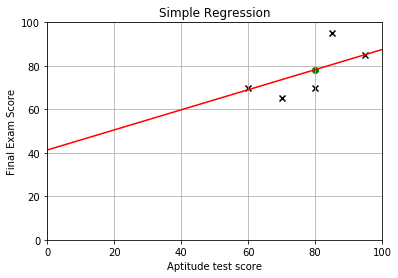

*** Iteration  100000  improvement 0.00023193618204686572  updatedRss:  352.1434718587524 
  B0:  41.313208898122866  B1:  0.4618885140766224 





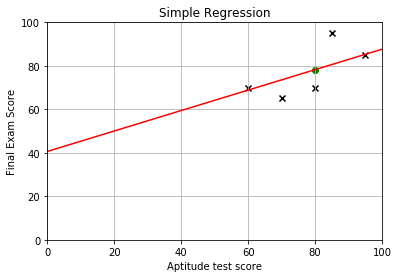

*** Iteration  110000  improvement 0.00021118547266496535  updatedRss:  349.92949445835336 
  B0:  40.64789234776981  B1:  0.4702183513333466 





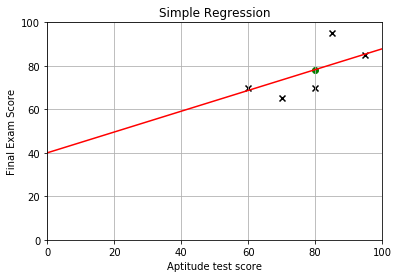

*** Iteration  120000  improvement 0.00019229127298103776  updatedRss:  347.91359569745055 
  B0:  40.0130350820217  B1:  0.4781668349559595 





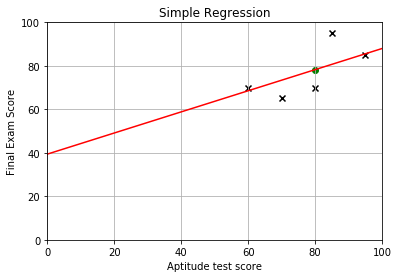

*** Iteration  130000  improvement 0.00017508748493355597  updatedRss:  346.0780540102549 
  B0:  39.40724262498293  B1:  0.4857514239389957 





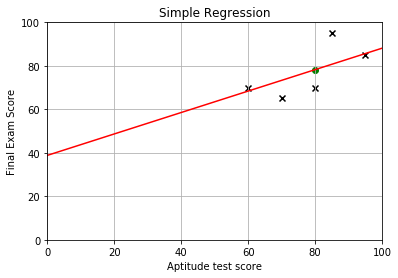

*** Iteration  140000  improvement 0.0001594228784256302  updatedRss:  344.40673333098863 
  B0:  38.82918434179146  B1:  0.4929887779795081 





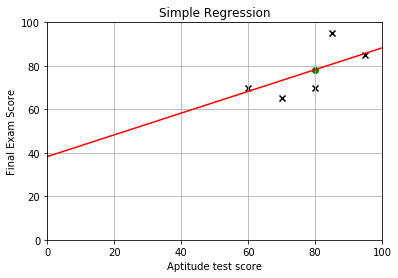

*** Iteration  150000  improvement 0.00014515973884954292  updatedRss:  342.88494124516745 
  B0:  38.277590516440796  B1:  0.49989479406149256 





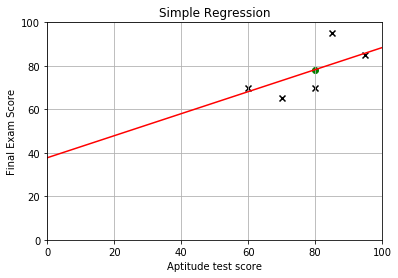

*** Iteration  160000  improvement 0.0001321726816172486  updatedRss:  341.499299828835 
  B0:  37.751249562412  B1:  0.5064846413856003 





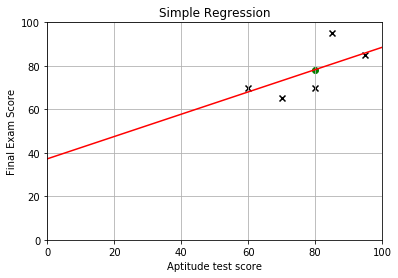

*** Iteration  170000  improvement 0.0001203475466695636  updatedRss:  340.2376280458361 
  B0:  37.24900536187192  B1:  0.5127727946736969 





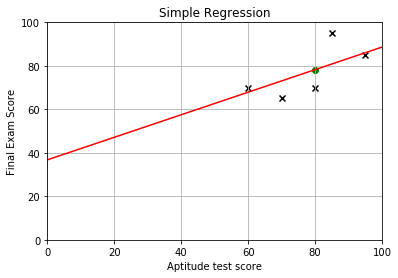

*** Iteration  180000  improvement 0.00010958037285035971  updatedRss:  339.0888346648367 
  B0:  36.76975472601043  B1:  0.518773065972755 





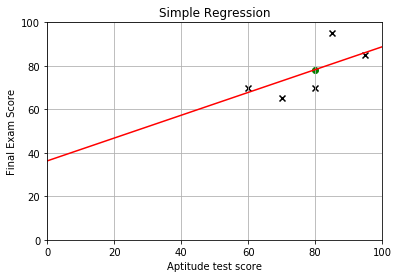

*** Iteration  190000  improvement 9.977651183135094e-05  updatedRss:  338.04282075658983 
  B0:  36.31244497150817  B1:  0.5244986349944611 





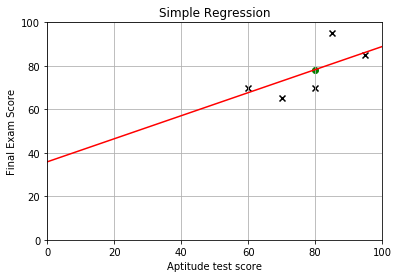

*** Iteration  200000  improvement 9.084977250495285e-05  updatedRss:  337.090390916738 
  B0:  35.876071608916504  B1:  0.5299620780593159 





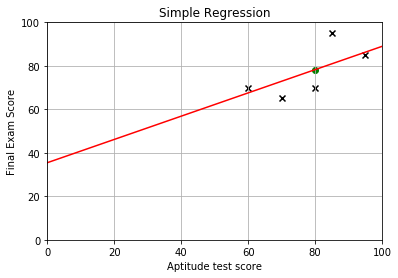

*** Iteration  210000  improvement 8.272168849998707e-05  updatedRss:  336.2231724286545 
  B0:  35.459676135731684  B1:  0.5351753957270831 





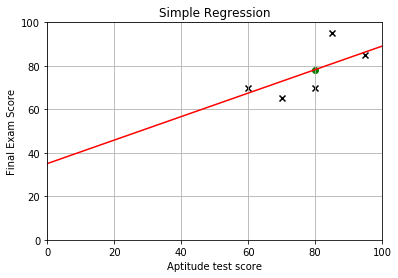

*** Iteration  220000  improvement 7.532079871452879e-05  updatedRss:  335.4335416605517 
  B0:  35.06234393139209  B1:  0.5401500391459877 





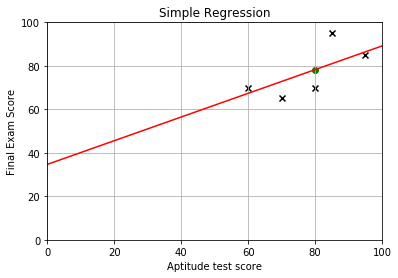

*** Iteration  230000  improvement 6.858204739046414e-05  updatedRss:  334.71455704659877 
  B0:  34.68320224817319  B1:  0.5448969352155928 





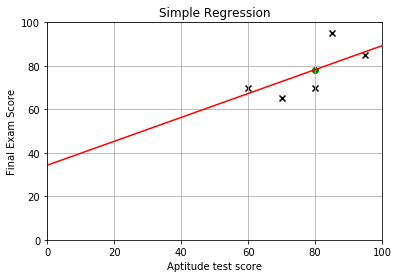

*** Iteration  240000  improvement 6.244619760309433e-05  updatedRss:  334.05989806403034 
  B0:  34.3214182940261  B1:  0.549426510585522 





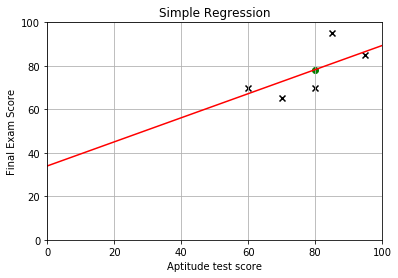

*** Iteration  250000  improvement 5.685930000254302e-05  updatedRss:  333.4638096706426 
  B0:  33.97619740364348  B1:  0.5537487145542628 





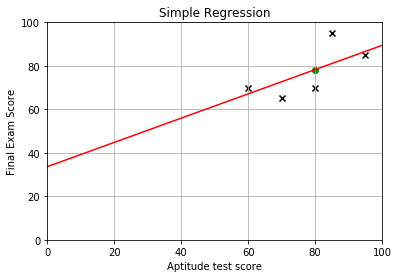

*** Iteration  260000  improvement 5.177225085617465e-05  updatedRss:  332.9210517124899 
  B0:  33.64678129281799  B1:  0.5578730409243235 





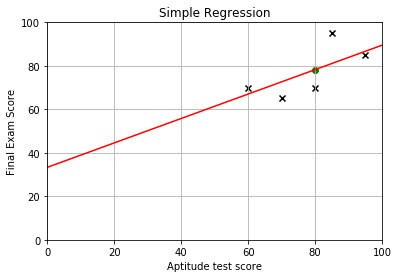

*** Iteration  270000  improvement 4.714032695574133e-05  updatedRss:  332.4268528579925 
  B0:  33.33244639271811  B1:  0.5618085488569478 





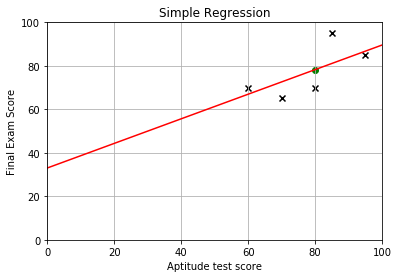

*** Iteration  280000  improvement 4.292280857498554e-05  updatedRss:  331.9768686539548 
  B0:  33.03250226074283  B1:  0.5655638827724261 





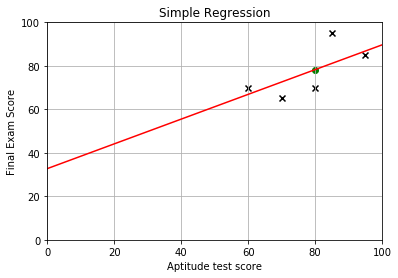

*** Iteration  290000  improvement 3.908261879814745e-05  updatedRss:  331.56714333381666 
  B0:  32.746290063903416  B1:  0.5691472913301141 





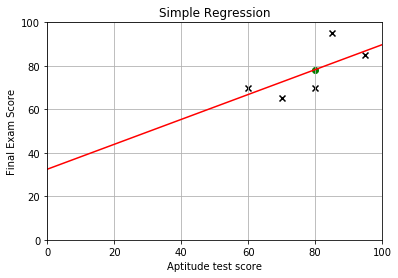

*** Iteration  300000  improvement 3.558600133146683e-05  updatedRss:  331.1940750428209 
  B0:  32.473181131627484  B1:  0.5725666455575038 





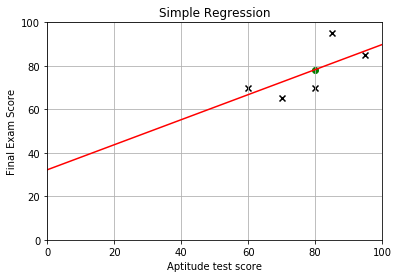

*** Iteration  310000  improvement 3.240221661826581e-05  updatedRss:  330.85438417455117 
  B0:  32.21257557493004  B1:  0.575829456130623 





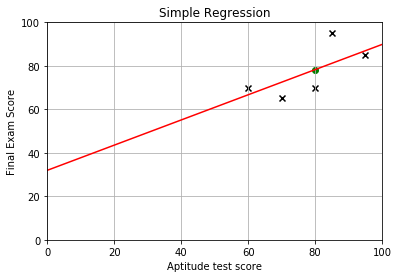

*** Iteration  320000  improvement 2.9503273140107922e-05  updatedRss:  330.5450845462426 
  B0:  31.963900973694308  B1:  0.5789428898142888 





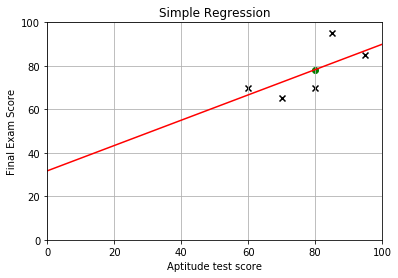

*** Iteration  330000  improvement 2.686369373350317e-05  updatedRss:  330.26345716089776 
  B0:  31.726611132087328  B1:  0.5819137850400466 





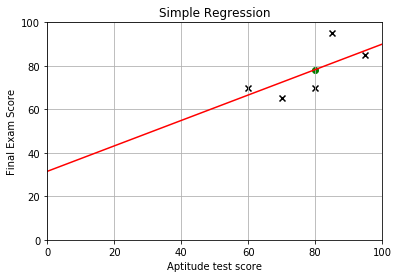

*** Iteration  340000  improvement 2.4460271731641114e-05  updatedRss:  330.00702622302737 
  B0:  31.50018480913559  B1:  0.5847486678047062 





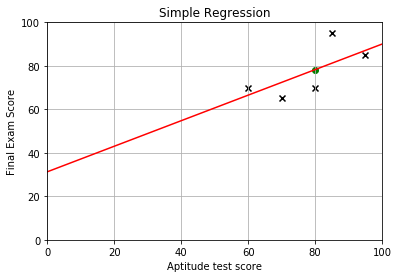

*** Iteration  350000  improvement 2.2271876389368117e-05  updatedRss:  329.7735374739691 
  B0:  31.28412465515339  B1:  0.5874537649779541 





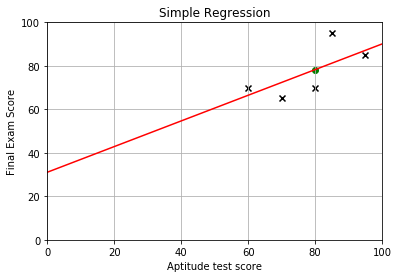

*** Iteration  360000  improvement 2.027927132530749e-05  updatedRss:  329.560938337381 
  B0:  31.077956089777103  B1:  0.5900350183620049 





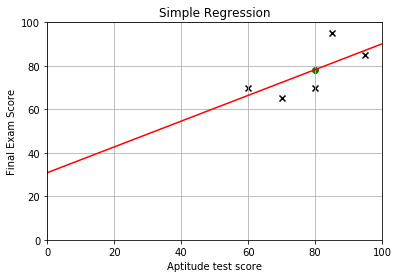

*** Iteration  370000  improvement 1.8464938932538644e-05  updatedRss:  329.3673598755783 
  B0:  30.881226259842833  B1:  0.5924980977269343 





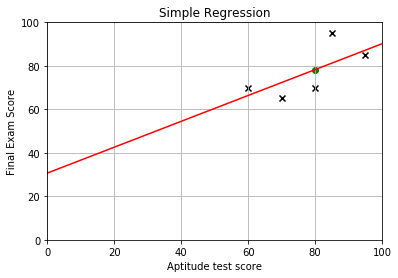

*** Iteration  380000  improvement 1.6812930766718637e-05  updatedRss:  329.1911003596957 
  B0:  30.69350304451291  B1:  0.5948484132758722 





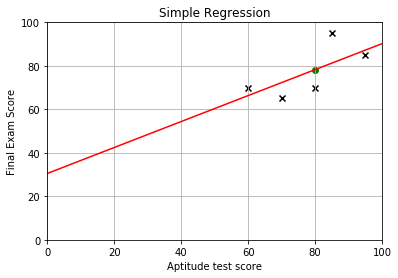

*** Iteration  390000  improvement 1.5308723391171952e-05  updatedRss:  329.0306103101326 
  B0:  30.51437410630342  B1:  0.5970911275173194 





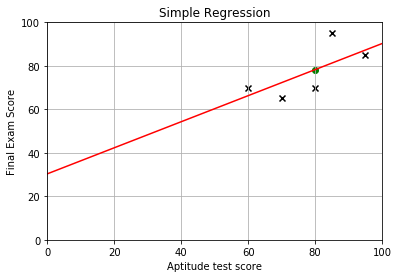

*** Iteration  400000  improvement 1.3939092923465068e-05  updatedRss:  328.8844788749479 
  B0:  30.3434459850763  B1:  0.5992311666190517 





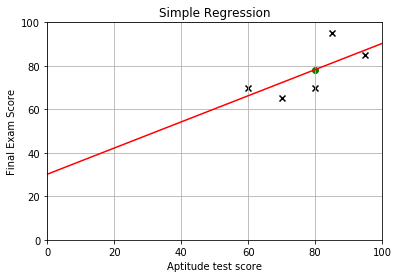

*** Iteration  410000  improvement 1.2691999586422753e-05  updatedRss:  328.7514214273028 
  B0:  30.180343233884628  B1:  0.601273231216328 





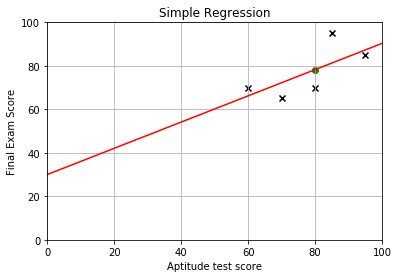

*** Iteration  420000  improvement 1.155648061512693e-05  updatedRss:  328.63026827262235 
  B0:  30.02470759453047  B1:  0.6032218067420445 





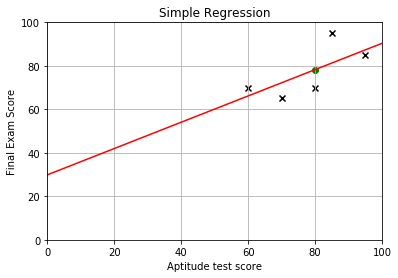

*** Iteration  430000  improvement 1.0522553111513844e-05  updatedRss:  328.51995436557166 
  B0:  29.876197210198256  B1:  0.6050811732822468 





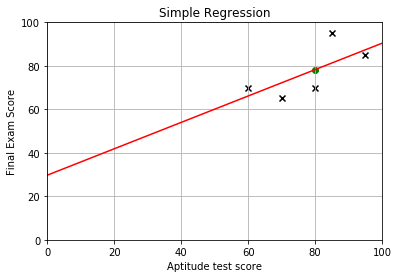

*** Iteration  440000  improvement 9.581128381341841e-06  updatedRss:  328.41950994783457 
  B0:  29.734485875193855  B1:  0.6068554149677994 





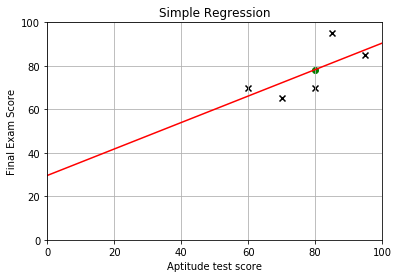

*** Iteration  450000  improvement 8.723930250198464e-06  updatedRss:  328.32805202264666 
  B0:  29.599262317886996  B1:  0.6085484289556462 





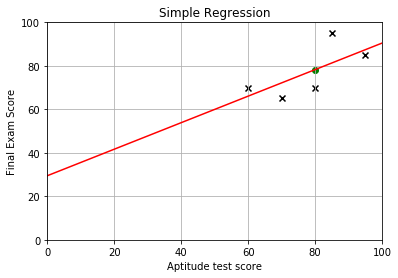

*** Iteration  460000  improvement 7.943424463974225e-06  updatedRss:  328.24477659255683 
  B0:  29.470229517106077  B1:  0.6101639339814711 





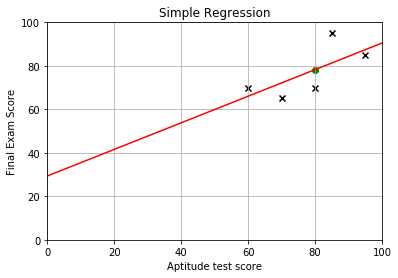

*** Iteration  470000  improvement 7.232747009311424e-06  updatedRss:  328.16895159157565 
  B0:  29.347104049724635  B1:  0.6117054785354867 





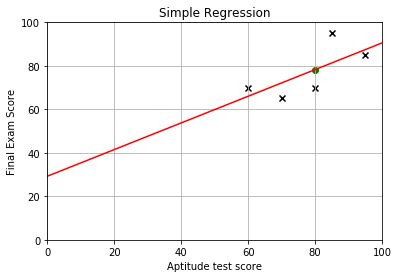

*** Iteration  480000  improvement 6.5856523292495694e-06  updatedRss:  328.09991044988755 
  B0:  29.22961546850445  B1:  0.6131764486505518 





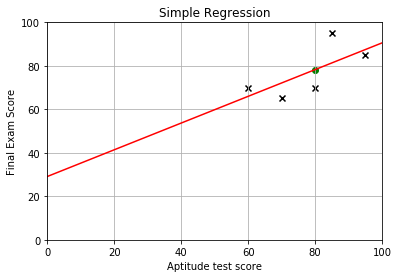

*** Iteration  490000  improvement 5.996452159706678e-06  updatedRss:  328.0370462337852 
  B0:  29.11750570755487  B1:  0.6145800753333106 





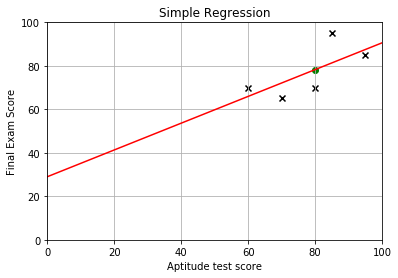

*** Iteration  500000  improvement 5.459965507270681e-06  updatedRss:  327.9798063101717 
  B0:  29.010528515430565  B1:  0.6159194416849687 



Done
Final Results


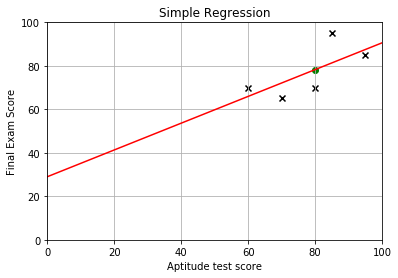

In [6]:
#Iteratively find best betas using gradient descent

#caution:  this dataset has very few points, so local gradient estimation has very little
#           gradient to go on in some dimensions.  this will make it slow and
#           highly dependent on your starting beta.  Dont use this on real problems!
#-----------------------------------------------------------


#setup the search
epsilon = 0.000001  #amount of change to beta; used to find emperical gradients of the cost surface near current beta values
convergenceThreshold = 0.00001  #If beta changes less than this amount, finish the search
improvement = 99999999.0  #start with an unreasonbly high improvement

learning_rate = 10.0
iteration_count = 0
done = False


t = np.array([[1, 80]])


print("Starting beta search")

while not done:
    #capture current rss value
    iteration_count = iteration_count+1
    #print(iterations)
    yhatold = np.dot(X,beta)
    oldRss = np.dot((yhatold-y).T , (yhatold-y))
    
    #call the student-written code to find the gradient of the cost surface
    #at the current coefficient values (beta)
    [rss0Gradient,rss1Gradient] = compute_gradient(X,y,beta,epsilon)
    
    #compute the updates to the betas using the learning rate
    b0Update = (rss0Gradient*learning_rate)
    b1Update = (rss1Gradient*learning_rate)

    
    #compute the new betas
    b0new = np.asscalar(beta[0,0]+b0Update)
    b1new = np.asscalar(beta[1,0]+b1Update)

    #set the new betas
    beta.itemset((0,0),b0new)  
    beta.itemset((1,0),b1new)             
    
    #test for convergence    
    #if total change in beta is small then done
    done = np.sqrt(b0Update**2+b1Update**2)<convergenceThreshold
    
    
    #test for amount of improvement in RSS
    yhat = np.dot(X,beta)
    updatedRss = np.dot((yhat-y).T , (yhat-y))
    
    
    #the following code will print an update after a certain number of iterations
    displayEveryIterations=10000  #how many iterations to run before displaying an update
    if not np.mod(iteration_count,displayEveryIterations):   
        ythat = np.dot(t,beta)
        beta0 = beta[0,0]
        beta1 = beta[1,0]
        plot_regression_results(X, y, t, ythat, beta0,beta1)
        improvement = oldRss-updatedRss
        print('*** Iteration ',iteration_count,
              ' improvement',np.asscalar(improvement),  
              ' updatedRss: ',np.asscalar(updatedRss),
              '\n',
              ' B0: ', np.asscalar(beta0), ' B1: ', np.asscalar(beta1),
              '\n\n\n' )

       

print("Done")

print("Final Results")
plot_regression_results(X, y, t, ythat, beta0,beta1)


